In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [2]:
df = pd.read_csv(r'../price_app2/BTC-USD.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
1255,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
1256,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
1257,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,46754964848
1258,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359


In [3]:
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

df.head()
print('done')

done


In [4]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns, index=df.index)
df.head()

,Close
Date,
2018-04-08,0.144879
2018-04-09,0.135207
2018-04-10,0.137657
2018-04-11,0.142767
2018-04-12,0.178001


done


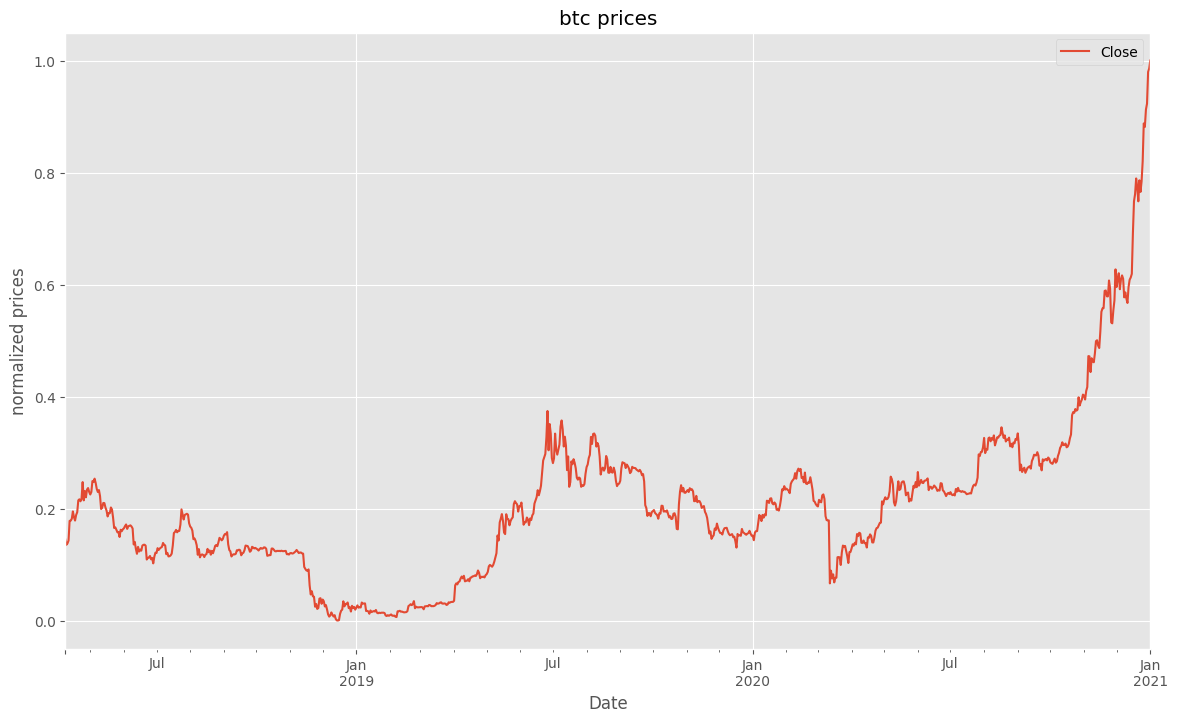

In [5]:
print('done')
df.plot(figsize=(14,8))
plt.title('btc prices')
plt.ylabel('normalized prices')
plt.show()

In [6]:
def split_sequences(seq, n_steps_in, n_steps_out):
    X,y =[], []
    
    for i in range(len(seq)):
        end = i+n_steps_in
        out_end = end+ n_steps_out
        
        if out_end >len(seq):
            break
            
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [7]:
def visualize_results(results):
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss','loss'])
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy','accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [8]:
n_per_in = 30
n_per_out = 10

n_features = 1

X,y = split_sequences(list(df.Close), n_per_in,n_per_out)

print(X.shape)

X = X.reshape(X.shape[0],X.shape[1],n_features)

print(X.shape)
print(y.shape)

(961, 30)
(961, 30, 1)
(961, 10)


In [9]:
model = Sequential()
model.add(LSTM(30, activation='softsign', return_sequences=True, input_shape=(n_per_in,n_features)))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign', return_sequences=True))
model.add(LSTM(10, activation='softsign'))
model.add(Dense(n_per_out))

model.summary()

2022-08-31 23:57:16.443243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:16.472091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:16.472142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:16.473709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

ut NUMA support.
2022-08-31 23:57:17.023573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:17.023652: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:17.023660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2022-08-31 23:57:17.023696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-31 23:57:17.023789: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 30, 10)            1640      
                                                                 
 lstm_2 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_3 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_4 (LSTM)               (None, 30, 10)            840       
                                                                 
 lstm_5 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 10)                1

In [10]:
model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

In [11]:
res = model.fit(X,y, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 11s 280ms/step - loss: 0.0233 - accuracy: 0.0868 - val_loss: 0.1648 - val_accuracy: 0.0412
Epoch 2/50
27/27 [==============================] - 7s 262ms/step - loss: 0.0104 - accuracy: 0.0845 - val_loss: 0.1314 - val_accuracy: 0.0412
Epoch 3/50
27/27 [==============================] - 6s 237ms/step - loss: 0.0059 - accuracy: 0.0868 - val_loss: 0.0883 - val_accuracy: 0.0412
Epoch 4/50
27/27 [==============================] - 6s 219ms/step - loss: 0.0034 - accuracy: 0.0810 - val_loss: 0.0769 - val_accuracy: 0.0412
Epoch 5/50
27/27 [==============================] - 7s 261ms/step - loss: 0.0029 - accuracy: 0.0938 - val_loss: 0.0809 - val_accuracy: 0.0412
Epoch 6/50
27/27 [==============================] - 7s 250ms/step - loss: 0.0026 - accuracy: 0.0880 - val_loss: 0.0737 - val_accuracy: 0.0412
Epoch 7/50
27/27 [==============================] - 7s 261ms/step - loss: 0.0024 - accuracy: 0.1123 - val_loss: 0.0664 - val_accuracy: 0.0412
Epoch

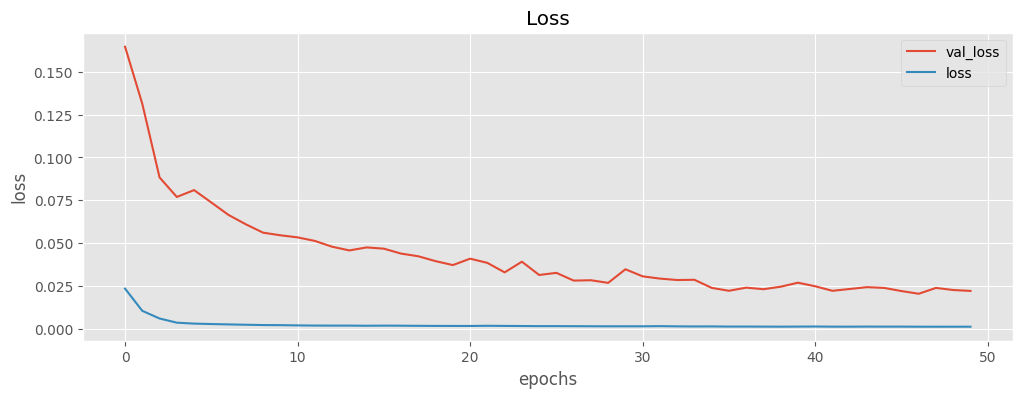

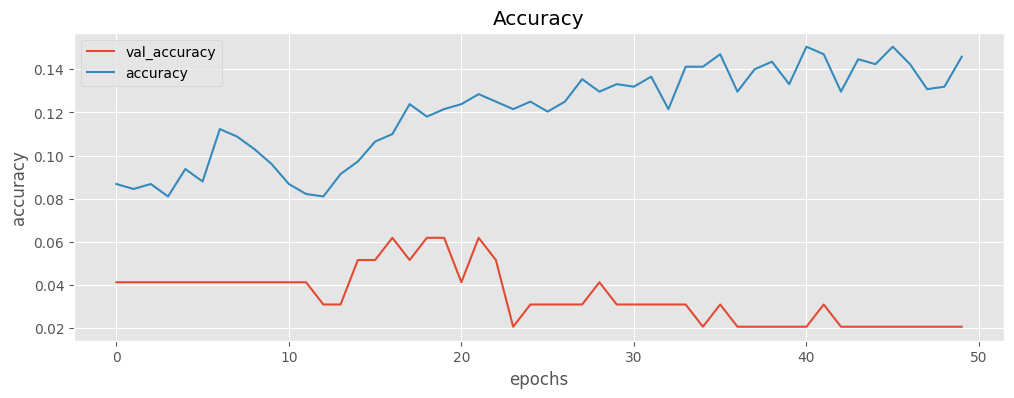

In [12]:
visualize_results(res)

1/1 [==============================] - 1s 709ms/step
predicted  [[16508.440226048635], [17129.120871117742], [17020.042252710493], [17608.955557343954], [17356.686325719053], [17191.940471352482], [16553.88757317181], [16804.608242372455], [16021.933011791141], [16424.063826755093]]
actuals  [[23241.345703], [23735.949219], [24664.791016], [26437.037109], [26272.294922], [27084.808594], [27362.437500000004], [28840.953125], [29001.720703], [29374.152344000002]]


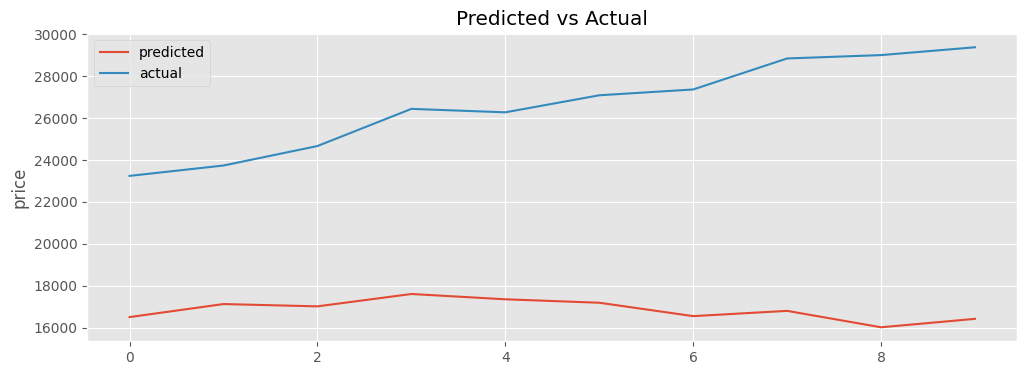

In [13]:
plt.figure(figsize=(12,4))

yhat = model.predict(X[-1].reshape(1,n_per_in,n_features)).tolist()[0]

yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

actual = scaler.inverse_transform(y[-1].reshape(-1,1))

print("predicted ", yhat)
plt.plot(yhat, label='predicted')

print("actuals ", actual.tolist())
plt.plot(actual.tolist(), label='actual')

plt.title("Predicted vs Actual")
plt.ylabel('price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 65ms/step
                   Close
2021-01-01  18444.414333
2021-01-02  19430.198949
2021-01-03  19370.640054
2021-01-04  20396.734030
2021-01-05  19932.858572
2021-01-06  19722.632655
2021-01-07  18684.700121
2021-01-08  19106.233146
2021-01-09  17937.789828
2021-01-10  18567.333423


/tmp/ipykernel_513/737373804.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), index = df.Close.tail(periods).index, columns = df.columns).append(preds.head(1))


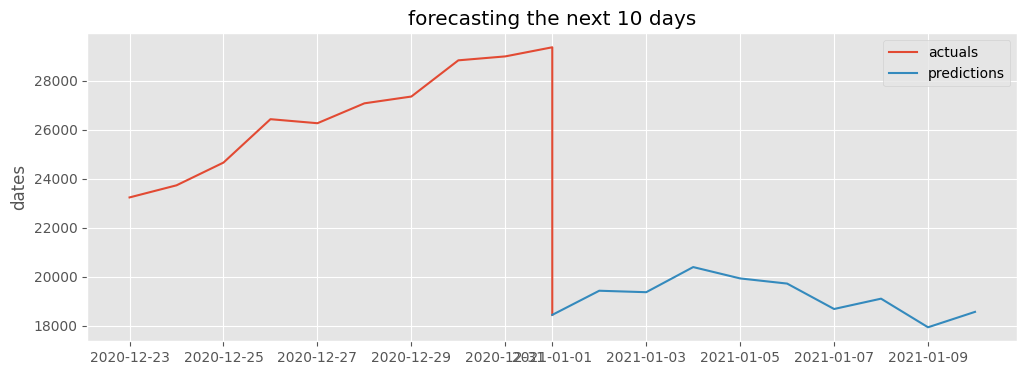

In [14]:
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1,n_per_in,n_features)).tolist()[0]
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat),freq="D"), columns=df.columns)

print(preds)

periods = 10

actual = pd.DataFrame(scaler.inverse_transform(df[['Close']].tail(periods)), index = df.Close.tail(periods).index, columns = df.columns).append(preds.head(1))

plt.figure(figsize=(12,4))
plt.plot(actual, label='actuals')
plt.plot(preds, label='predictions')
plt.ylabel("price")
plt.ylabel('dates')
plt.title(f'forecasting the next {len(yhat)} days')
plt.legend()
plt.show()